In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras.applications import ResNet50
from keras.models import Model, Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.applications.resnet50 import preprocess_input

Using TensorFlow backend.


In [4]:
# path to training images
train_path= "F:\\Swastik\\study\\ml\\datasets\\mini_project_data\\train\\"

In [5]:
# path to test images
test_path= "F:\\Swastik\\study\\ml\\datasets\\mini_project_data\\test\\"

Number of classes in train directory.

In [6]:
print(len(next(os.walk(train_path))[1]))

28


Number of classes in test directory.

In [7]:
print(len(next(os.walk(test_path))[1]))

28


In [9]:
classes=os.listdir(train_path)

In [10]:
print(classes)

['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


Let us see sample images of each class

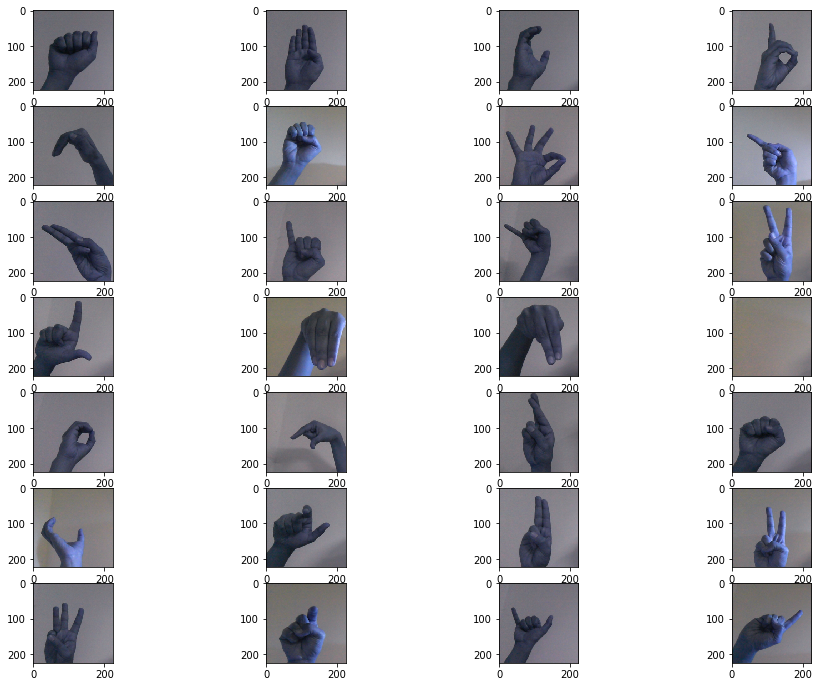

In [11]:
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(16, 12))
count=0
for row in ax:
    for col in row:
        img = cv2.imread(train_path+classes[count]+"\\1.png")
        count+=1
        col.imshow(img)

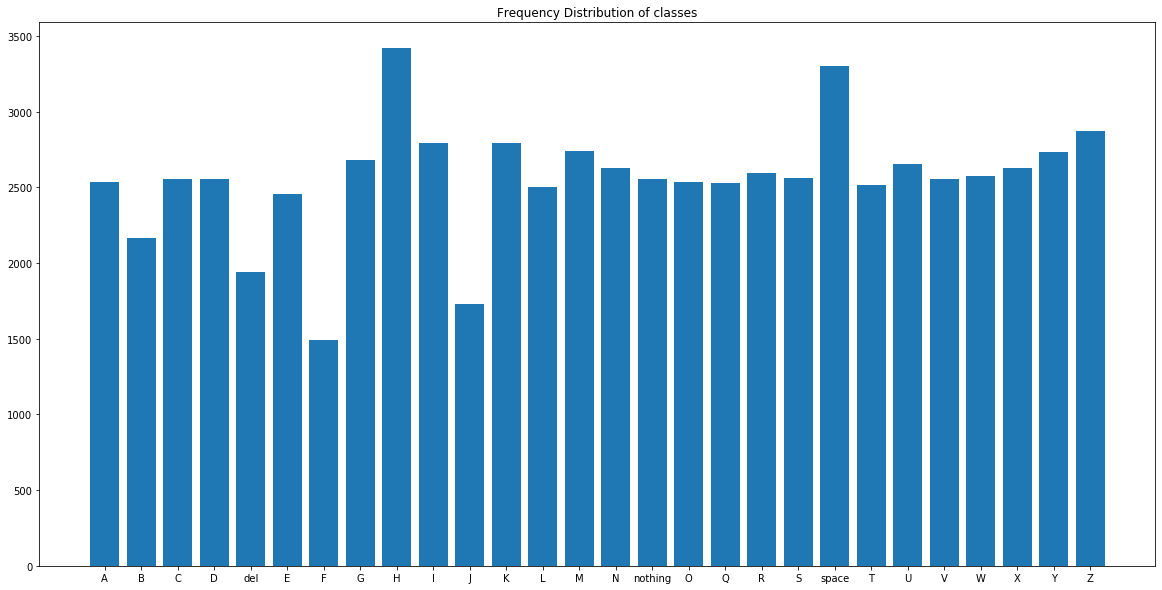

In [12]:
frequencies=[]

for i in classes:
    frequencies.append(len(os.listdir(train_path+i)))
labels = classes
plt.figure(figsize = (20, 10))
plt.bar(labels, frequencies)
plt.title('Frequency Distribution of classes')
plt.show()

In [13]:
PATH = "F:\\Swastik\\study\\ml\\datasets\\mini_project_data\\"
sz=224
batch_size=64

In [14]:
train_data_dir = f'{PATH}train'
validation_data_dir = f'{PATH}test'

In [15]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(train_data_dir,
    target_size=(sz, sz),
    batch_size=batch_size, class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
    shuffle=False,
    target_size=(sz, sz),
    batch_size=batch_size, class_mode='categorical')

Found 71589 images belonging to 28 classes.
Found 26549 images belonging to 28 classes.


In [16]:
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(28, activation='softmax')(x)

C:\Users\Swastik Singh\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [17]:
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers: layer.trainable = False
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model.fit_generator(train_generator, train_generator.n // batch_size, epochs=3, workers=4,
                    validation_data=validation_generator, validation_steps=validation_generator.n // batch_size)

Epoch 1/3
2388/2388 [==============================] - 1522s 637ms/step - loss: 0.0225 - acc: 0.9935 - val_loss: 0.3050 - val_acc: 0.9496
Epoch 2/3
2388/2388 [==============================] - 1504s 630ms/step - loss: 0.0079 - acc: 0.9969 - val_loss: 0.3884 - val_acc: 0.9529
Epoch 3/3
2388/2388 [==============================] - 1507s 631ms/step - loss: 0.0071 - acc: 0.9972 - val_loss: 0.3569 - val_acc: 0.9534


## Training the end layers again

In [18]:
for layer in base_model.layers[:165]:
   layer.trainable = False
for layer in base_model.layers[165:]:
   layer.trainable = True

In [19]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name, layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1 False
3 bn_conv1 False
4 activation_1 False
5 pool1_pad False
6 max_pooling2d_1 False
7 res2a_branch2a False
8 bn2a_branch2a False
9 activation_2 False
10 res2a_branch2b False
11 bn2a_branch2b False
12 activation_3 False
13 res2a_branch2c False
14 res2a_branch1 False
15 bn2a_branch2c False
16 bn2a_branch1 False
17 add_1 False
18 activation_4 False
19 res2b_branch2a False
20 bn2b_branch2a False
21 activation_5 False
22 res2b_branch2b False
23 bn2b_branch2b False
24 activation_6 False
25 res2b_branch2c False
26 bn2b_branch2c False
27 add_2 False
28 activation_7 False
29 res2c_branch2a False
30 bn2c_branch2a False
31 activation_8 False
32 res2c_branch2b False
33 bn2c_branch2b False
34 activation_9 False
35 res2c_branch2c False
36 bn2c_branch2c False
37 add_3 False
38 activation_10 False
39 res3a_branch2a False
40 bn3a_branch2a False
41 activation_11 False
42 res3a_branch2b False
43 bn3a_branch2b False
44 activation_12 False
45 res3a_branch2c False

In [20]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(train_generator, train_generator.n // batch_size, epochs=3, workers=4,
                    validation_data=validation_generator, validation_steps=validation_generator.n // batch_size)